In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/data (1).csv')

data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


data.fillna(data.mean(), inplace=True)

In [18]:
scaler = StandardScaler()
features = data.drop('diagnosis', axis=1)
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['diagnosis'], test_size=0.2, random_state=42)

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

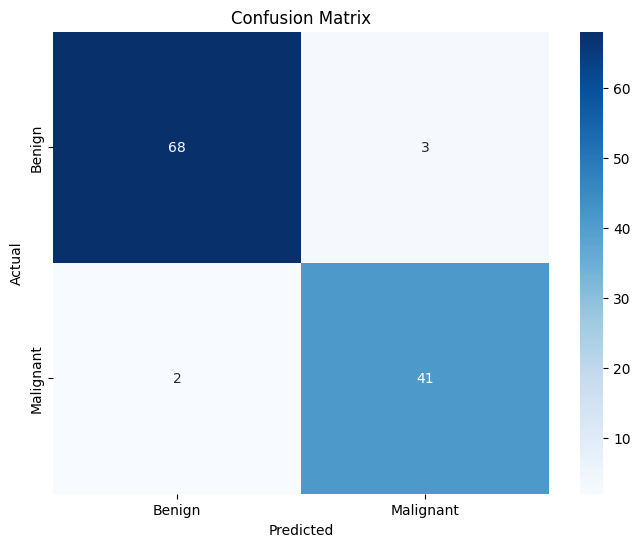

Accuracy: 0.956140350877193
Note: SVM's performance on this dataset might be comparable to or slightly better than simpler models like logistic regression. The optimal choice depends on the specific dataset and tuning.  SVM can be effective when there's a clear separation between classes, even in higher dimensional spaces. Experimenting with other models would provide a more complete picture.


In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy}")

print("Note: SVM's performance on this dataset might be comparable to or slightly better than simpler models like logistic regression. The optimal choice depends on the specific dataset and tuning.  SVM can be effective when there's a clear separation between classes, even in higher dimensional spaces. Experimenting with other models would provide a more complete picture.")
